<a href="https://colab.research.google.com/github/hhidayatinc/Machine_Learning/blob/main/Kuis1_HidayatiNurChasanah.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#connect googledrive
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# import package
import numpy as np
import pandas as pd

In [19]:
# baca data
data = pd.read_csv('/content/drive/MyDrive/dataset/WHO_MHExp_and_Deaths.csv')
data = data.dropna()
data.head()

,Country_Name,Year,Population,Deaths_All_Types,Deaths_Suicides,HExp_Pctage_Y,MHExp_Pctage_2011,Dep_Num_2015,Suicide_p100
0,Armenia,2006,3219235.0,54404,78,5.85,3.38,4.99,5.36
1,Armenia,2007,3107395.5,53660,0,5.50,3.38,4.99,5.02
2,Armenia,2008,3234031.0,54824,63,6.64,3.38,4.99,4.23
3,Armenia,2009,3066044.0,55120,53,8.44,3.38,4.99,4.06
4,Armenia,2012,3024127.0,55200,79,9.13,3.38,4.99,6.39


In [11]:
# pemahaman terhadap data
# ukuran data
data.shape

# info data
data.info()

# deskripsi data
data.describe()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 531 entries, 0 to 530
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Country_Name       531 non-null    object 
 1   Year               531 non-null    int64  
 2   Population         531 non-null    float64
 3   Deaths_All_Types   531 non-null    int64  
 4   Deaths_Suicides    531 non-null    int64  
 5   HExp_Pctage_Y      531 non-null    float64
 6   MHExp_Pctage_2011  531 non-null    float64
 7   Dep_Num_2015       531 non-null    float64
 8   Suicide_p100       531 non-null    float64
dtypes: float64(5), int64(3), object(1)
memory usage: 41.5+ KB


,Year,Population,Deaths_All_Types,Deaths_Suicides,HExp_Pctage_Y,MHExp_Pctage_2011,Dep_Num_2015,Suicide_p100
count,531.000000,5.310000e+02,5.310000e+02,531.000000,531.000000,531.000000,531.000000,531.000000
mean,2009.694915,2.535148e+07,4.322763e+05,259.659134,7.555631,5.731205,4.890603,10.832768
std,5.572266,3.285463e+07,5.856799e+05,1075.051391,2.103642,2.952330,0.605882,5.491425
min,2000.000000,2.811540e+05,8.360000e+02,0.000000,1.990000,0.390000,2.900000,0.820000
25%,2005.000000,3.553031e+06,5.733600e+04,0.000000,6.100000,3.860000,4.570000,6.415000
50%,2010.000000,9.696110e+06,1.841500e+05,2.000000,7.900000,5.080000,5.060000,10.240000
75%,2014.000000,3.811594e+07,7.411640e+05,42.500000,9.070000,7.640000,5.190000,14.495000
max,2019.000000,2.101471e+08,2.762186e+06,20031.000000,13.680000,12.910000,5.940000,29.630000


In [5]:
# import library untuk visualisasi
import matplotlib.pyplot as plt 
import seaborn as sns

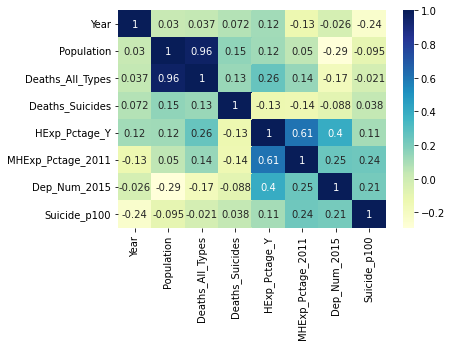

In [20]:
sns.heatmap(data.corr(), cmap="YlGnBu", annot = True)
plt.show()

In [29]:
# Buat variabel bebas X dan Y, sebagai contoh ambil dari hasil analisis korelasi dari kegaitan sebelumnya
X = data['HExp_Pctage_Y']
y = data['Suicide_p100']

# Buat pemisahan data uji dan data latih dengan proporsi 7:3
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, 
                                                    test_size = 0.3, random_state = 100)

# hasil training dtaset
X_train
y_train

450    13.97
129    14.41
380    15.29
239     5.27
21     10.41
       ...  
526     9.20
53     10.86
350     9.09
79      3.59
520     8.22
Name: Suicide_p100, Length: 371, dtype: float64

In [30]:
# training model
import statsmodels.api as sm

X_train_sm = sm.add_constant(X_train)
# fitting garis regresi
lr = sm.OLS(y_train, X_train_sm).fit()
lr.params
# analisis statistika dari garis regresi
lr.summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Suicide_p100   R-squared:                       0.014
Model:                            OLS   Adj. R-squared:                  0.011
Method:                 Least Squares   F-statistic:                     5.254
Date:                Wed, 21 Sep 2022   Prob (F-statistic):             0.0225
Time:                        06:14:28   Log-Likelihood:                -1164.5
No. Observations:                 371   AIC:                             2333.
Df Residuals:                     369   BIC:                             2341.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             8.3885      1.083      7.744      0.000       6.259      10.519
HExp_Pctage_Y     0.3180      0.139      2.292      0.022       0.045       0.591
==============================================================================
Omnibus:                       23.700   Durbin-Watson:                   1.883
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               26.952
Skew:                           0.660   Prob(JB):                     1.40e-06
Kurtosis:                       3.031   Cond. No.                         29.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

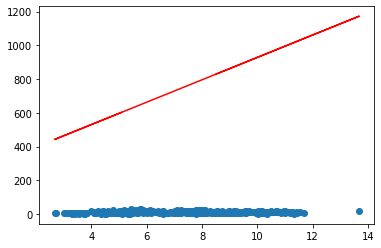

In [31]:
# visualisasi garis regresi
plt.scatter(X_train, y_train)
plt.plot(X_train, 265.2483 + 66.3015*X_train, 'r')
plt.show()

In [32]:
# prediksi y_value dari data x yang telah dilatih
y_train_pred = lr.predict(X_train_sm)

res = (y_train - y_train_pred)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


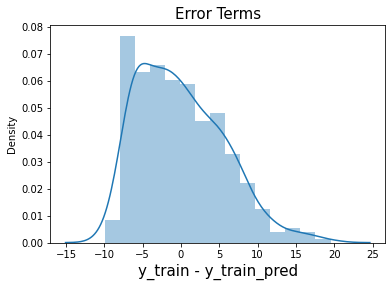

In [33]:
# cek histogram apakah berdistribusi normal atau tidak
fig = plt.figure()
sns.distplot(res, bins = 15)
plt.title('Error Terms', fontsize = 15)
plt.xlabel('y_train - y_train_pred', fontsize = 15)
plt.show()

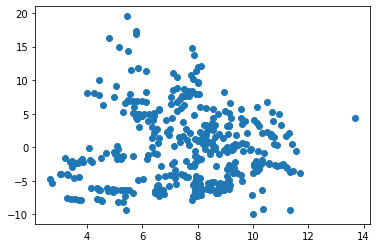

In [34]:
plt.scatter(X_train,res)
plt.show()

In [35]:
# prediksi pada data uji dan evaluasi model
X_test_sm = sm.add_constant(X_test)

# prediksi y value yang berkorelasi dengan X_test_sm
y_test_pred = lr.predict(X_test_sm)

# cetak 5 data terprediksi teratas
y_test_pred.head()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


391    11.457613
474    10.999636
421    10.617988
310     9.488947
302    10.357196
dtype: float64

In [36]:
# hitung nilai r^2
from sklearn.metrics import r2_score

r_squared = r2_score(y_test, y_test_pred)
r_squared

0.00613735780907354

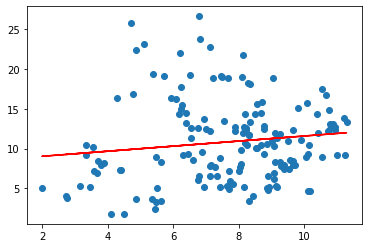

In [37]:
# visualisasi data
plt.scatter(X_test, y_test)
plt.plot(X_test, y_test_pred, 'r')
plt.show()